<img align="center" style="max-width: 800px" src="banner.png">

<img align="right" style="max-width: 200px; height: auto" src="hsg_logo.png">

##  Lab 03 - Gaussian Naive Bayes Classification

GSERM Summer School 2024, Deep Learning: Fundamentals and Applications, University of St. Gallen

The Summer School lab environment is based on Jupyter Notebooks (https://jupyter.org) and Python (https://www.python.org), allowing us to perform various statistical evaluations and data analyses. In our previous lab, you learned about various elements of Python programming, including conditions, loops, and function implementation, among others. In this third lab, we will construct our first **supervised machine learning classification 'pipelines'** using a classifier known as the **Gaussian Naive-Bayes (GNB)** classifier.

The **Naive-Bayes (NB)** classifier, a *generative* classifier, is a straightforward 'probabilistic classifier'. It applies Bayes' theorem, underpinning its operation with strong (naive) independence assumptions between features. The Naive Bayes method has been extensively researched since the 1950s and continues to be an accessible baseline method for text categorization and other domains. This classification technique belongs to the **generative** type of classifiers, distinguishable from the **discriminative** type, as depicted in the subsequent illustration:

<img align="center" style="max-width: 800px; height: auto" src="./classifiers_generative.png">

(Courtesy: Intro to AI & ML lecture, Prof. Dr. Borth, University of St. Gallen)

As always, please feel free to ask any questions during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send them to us via email (using the course email).

## 1. Lab Objectives:

After today's lab, you should be able to:

1. Understand how to set up a **notebook or "pipeline"** that solves a simple supervised classification task.
2. Recognize the **data elements** needed to train and evaluate a supervised machine learning classifier. 
3. Understand how a generative Gaussian **Naive-Bayes (NB)** classifier can be trained and evaluated.
4. Know how to use Python's sklearn library to **train** and **evaluate** arbitrary classifiers.
5. Understand how to **evaluate** and **interpret** the classification results.

Before we start, let's watch a motivational video:

In [1]:
from IPython.display import YouTubeVideo
# OpenAI: "Solving Rubik's Cube with a Robot Hand"
# YouTubeVideo('x4O8pojMF0w', width=800, height=600)

## 2. Setup of the Jupyter Notebook Environment

First, we need to import a couple of Python libraries that allow for data analysis and data visualization. This lab will use the `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` and the `Seaborn` library. Let's import these libraries by executing the statements below:

In [2]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes classifier library
from sklearn.naive_bayes import GaussianNB

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Let's enable inline Jupyter notebook plotting:

In [3]:
%matplotlib inline

Let's set the `Seaborn` plotting theme for all subsequent visualizations:

In [4]:
sns.set_theme(style='darkgrid')

## 3. Dataset Download and Pre-Processing

### 3.1 Dataset Download and Data Assessment

The **Iris Dataset** is a classic and straightforward dataset frequently used as a "Hello World" example in multi-class classification. This dataset consists of measurements taken from three different types of iris flowers (referred to as **Classes**), namely the `Iris Setosa`, the `Iris Versicolor` and the `Iris Virginica`, and their respective measured petal and sepal length (referred to as **Features**).

<img align="center" style="max-width: 700px; height: auto" src="./iris_dataset.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

The dataset, in total, contains **150 samples** (50 samples per class) and their corresponding **4 different measurements** for each sample. The individual measurements include:

- `Sepal length (cm)`
- `Sepal width (cm)`
- `Petal length (cm)`
- `Petal width (cm)`

Further details about the dataset can be found in the following publication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).*"

Let's load the dataset and conduct a preliminary data assessment:

In [5]:
iris = datasets.load_iris()

Print and inspect the names of the four features contained in the dataset:

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's determine and print the feature dimensionality of the dataset:

In [7]:
iris.data.shape

(150, 4)

Determine and print the class label dimensionality of the dataset:

In [8]:
iris.target.shape

(150,)

Print and inspect the names of the three classes contained in the dataset:

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="./feature_collection.png">

Now, let's examine the first five rows of feature data from the Iris Dataset:

In [10]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We should also take a look at the first five class labels from the Iris Dataset:

In [11]:
pd.DataFrame(iris.target, columns=["class"]).head(5)

,class
0,0
1,0
2,0
3,0
4,0


Next, we'll conduct a thorough assessment of the data. We'll plot the feature distributions from the Iris dataset, taking into account both the class membership of each datapoint and the pairwise relationships between features.

To create this plot, we'll use the **Seaborn** library in Python, which produces what's known as a **Pairplot**. Seaborn is a great data visualization library that builds on Matplotlib, offering a powerful interface for generating informative statistical graphics. You can find out more at [https://seaborn.pydata.org](https://seaborn.pydata.org). 

<Figure size 1000x1000 with 0 Axes>

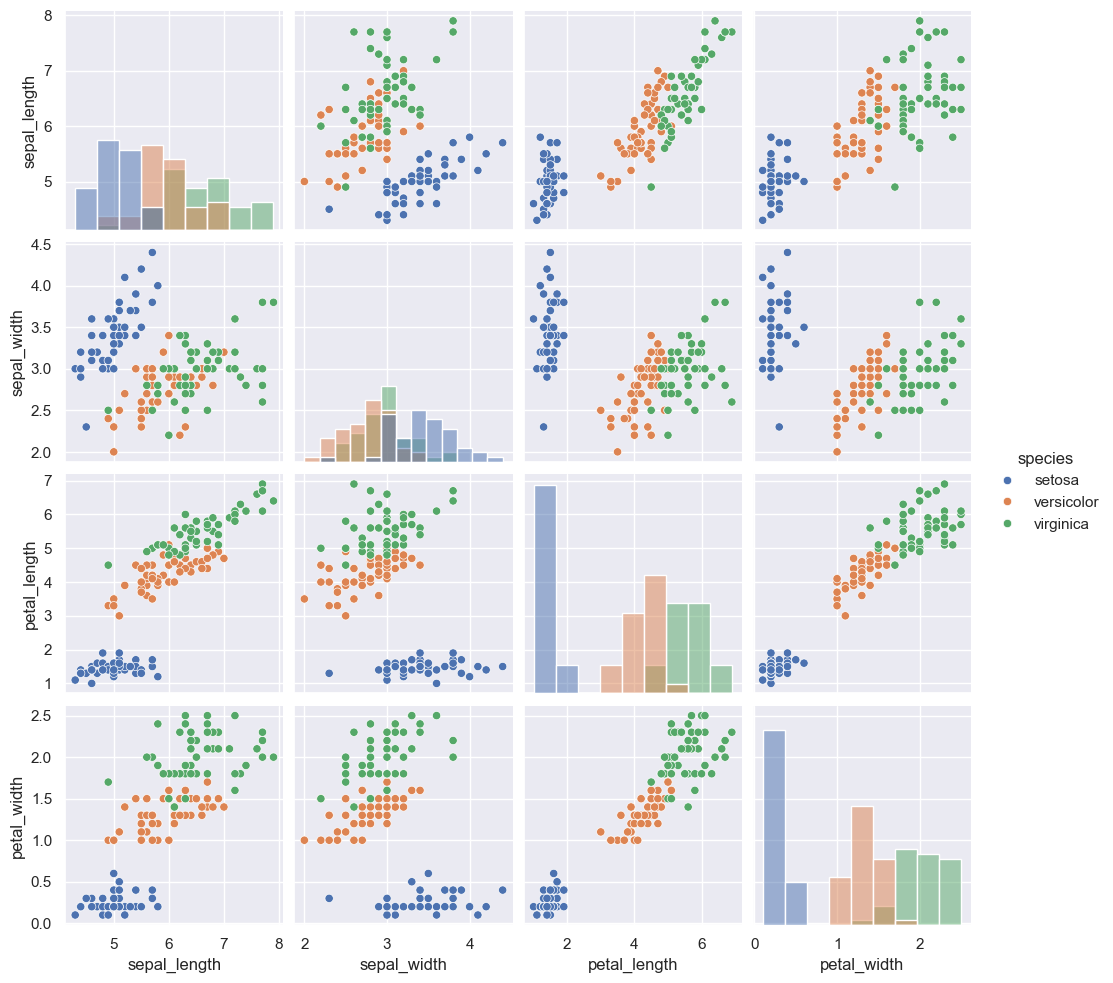

In [12]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Observing the Pairplot, we can see that most feature measurements corresponding to the `setosa` flower class demonstrate **linear separability** when compared to measurements from other flower classes. Meanwhile, the `versicolor` and `virginica` classes show a mixed, or **non-linear separability**, across all feature distributions in the Iris Dataset.

### 3.2 Dataset Pre-Processing

In order to understand and effectively evaluate the performance of any trained **supervised machine learning** model, it's good practice to split the dataset into a **training set** (a portion of the data used solely for training purposes) and an **evaluation set** (a portion of the data used exclusively for evaluation). Please remember that the **evaluation set** is kept separate from the model during the training phase.

<img align="center" style="max-width: 500px; height: auto" src="./train_eval_dataset.png">

To conduct an effective model evaluation, we will designate **30%** of the original dataset as evaluation data:

In [13]:
eval_fraction = 0.3

For reproducibility, let's also establish a random seed for our train-test split, ensuring consistent results across different runs of the notebook:

In [14]:
seed = 42

The choice of 42 is a nod to Douglas Adams' **Hitchhiker's Guide to the Galaxy** (https://en.wikipedia.org/wiki/The_Hitchhiker%27s_Guide_to_the_Galaxy), where it is described as the *"Answer to the Ultimate Question of Life, the Universe, and Everything"*.

We'll now randomly split the dataset into a training set and an evaluation set using sklearn's `train_test_split` function:

In [15]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris.data, iris.target, test_size=eval_fraction, random_state=seed)

Let's now examine the dimensions of our training set:


In [16]:
x_train.shape, y_train.shape

((105, 4), (105,))

And, let's also evaluate the dimensions of our evaluation set:

In [17]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

## 4. Gaussian Naive-Bayes (NB) Classification

One prevalent (and remarkably straightforward) algorithm is the **Naive Bayes Classifier**. A natural way to address a given classification task involves the probabilistic query: 

<center>Given all the available information $x$, which is the most probable class $c^{*}$?</center>

We aim to produce a conditional probability $P(c|x)$ for each class $c$, given distinct observations of $x$. Once we've computed this conditional probability for each class, we select the class $c^{*}$ corresponding to the highest $P(c|x)$.

$$c^{*} = \arg \max_{c} P(c|x)$$

That would require us to be prepared to estimate the probability distribution $P(c | x)$ for every possible value of $x = {x1, x2, ..., xn}$. Here, $P(c | x)$ denotes the **conditional probability** read as "the probability of c given x". Formally, the conditional probability is defined as 

$$P(c | \mathbf{x}) = \frac{P(c, \mathbf{x})}{P(\mathbf{x})},$$

where $P(c, x)$ refers to the **joint probability** of c and x occurring simultaneously.

**Excursion:** Imagine a document classification system that, depending on the occurrence of a particular set of words in a document, predicts the class of the document. For example, if the words **"recipe"**, **"pumpkin"**, **"cuisine"**, **"pancakes"**, etc. appear in the document, the classifier predicts a high probability of the document being a cookbook. 

Let's assume that the feature $x_{pancake}$ ` = 1` might signify that the word **"pancakes"** appears in a given document and $x_{pancake}$ ` = 0` would signify that it does not. If we had **30** such binary **"word-appearance" features**, that would mean that we need to be prepared to calculate the probability $P(c | x)$ of any of 2^30 (over 1 billion) possible values of the input vector $x = {x1, x2, ..., x30}$:

$$\mathbf{x^{1}}= \{x_1=1, x_2=0, x_3=0, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$\mathbf{x^{2}}= \{x_1=1, x_2=1, x_3=0, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$\mathbf{x^{3}}= \{x_1=1, x_2=1, x_3=1, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$...$$
$$...$$
$$\mathbf{x^{2^{30}-1}}= \{x_1=1, x_2=1, x_3=1, x_4=1, x_5=1, x_6=1, ..., x_{29}=0, x_{30}=1\}$$
$$\mathbf{x^{2^{30}}}= \{x_1=1, x_2=1, x_3=1, x_4=1, x_5=1, x_6=1, ..., x_{29}=1, x_{30}=1\}$$

Moreover, where is the learning? If we need to see every possible example to predict the corresponding label, then we're not learning a pattern but just memorizing the dataset. 

One solution to this challenge is the so-called **Bayes' theorem** (alternatively Bayes' law or Bayes' rule) you learned about in the lecture. A common scenario for applying the Bayes' theorem formula is when you want to know the probability of something "unobservable" (e.g., the class $c$ of a document) given an "observed" event (e.g., the distinct words $x$ contained in the document). Such a probability is usually called the **posterior probability**, mathematically denoted by $P(c|x)$.

The formula from Bayes' theorem provides an elegant way of calculating such posterior probabilities $P(c|x)$ without the need to observe every single possible configuration of $\mathbf{x} = \{x_1, x_2, ..., x_n\}$. Let's briefly revisit the formula for Bayes' theorem below:

<img align="center" style="max-width: 400px; height: auto" src="./bayes_theorem.png">

In the formula of the **Bayes' theorem** above,

>- $P(c|x)$ denotes the **posterior** probability of class $c$ given a set of features $x$ denoted by $x_1, x_2, ..., x_n$.
>- $P(c)$ denotes the **prior** probability of observing class $c$.
>- $P(x|c)$ denotes the **likelihood** which is the probability of a feature $x$ given class $c$.
>- $P(x)$ denotes the **evidence** which is the general probability of observing feature $x$.

### 4.1 Calculation of the prior probabilities $P(c)$ of each class

Let's develop an intuition for Bayes' theorem by initially calculating the prior probability, $P(c)$, for each class of iris flower in the dataset. To achieve this, we need to determine the occurrence count for each class in the extracted training data:

In [18]:
# determine counts of unique class labels
unique, counts = np.unique(y_train, return_counts=True)

# concatenate counts and class labels in a python dictionary
class_counts = dict(zip(unique, counts))

# print obtained dictionary
print(class_counts)

{0: 31, 1: 37, 2: 37}


Let's convert the obtained counts into probabilities. Therefore, we divide the class counts by the total number of observations in the extracted training data:

In [19]:
# divide counts by the number of observations available in the training data
prior_probabilities = counts / np.sum(counts)

# print obtained probabilites
print(prior_probabilities)

[0.2952381  0.35238095 0.35238095]


Next, let's plot the obtained prior probabilities $P(c)$ accordingly.

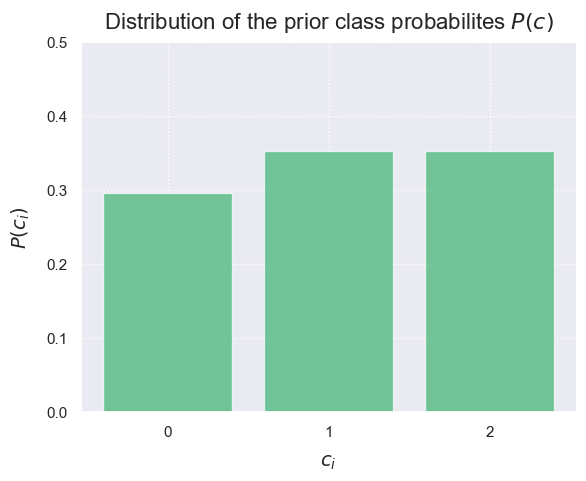

In [20]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.bar(x=np.unique(iris.target), height=prior_probabilities, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$c_{i}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(c_{i})$", fontsize=14, labelpad=10)

# set x-axis ticks
ax.set_xticks(np.unique(iris.target))

# set y-axis range
ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the prior class probabilites $P(c)$', fontsize=16, pad=10);

### 4.2 Calculation of the evidence $P(x)$ of each feature

Let's now calculate the general probability of observing a particular observation $𝑥$, which, from a Bayes' theorem perspective, denotes the evidence $P(\mathbf{x})$ of an observation $x=\{x_1, x_2, ..., x_n\}$. We assume that the first feature $x_{1}$ represents the "sepal length" observations of the Iris Dataset, the second feature $x_{2}$ represents "sepal width", $x_{3}$ represents "petal length", and $x_{4}$ represents "petal width". To calculate the evidence $P(x)$ of a particular observation, for example, $x=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$, the Bayes' theorem in general utilizes the following two tricks:

**Trick 1: "Conditional Independence"** 

Using the **"Chain Rule of Probabilities"**, we can express the evidence term $P( \mathbf{x} )$ as:

$$P( \mathbf{x}) = P(\{x_1, x_2, ..., x_n\}) = P(x_1) \cdot P(x_2 | x_1) \cdot P(x_3 | x_1, x_2) \cdot P(x_4 | x_1, x_2, x_3) \cdot ... \cdot P( x_n | x_1, ..., x_{n-1}) = \prod^n_i P(x_i | x_{1:i-1})$$

On its own, this expression does not provide further progress. Even for $d$ binary features, we still need to estimate approximately $2^d$ parameters. However, the naive Bayes theorem trick is to assume that the distinct features $x_1, x_2, \dots, x_n$ are conditionally independent when observing a specific class $c$. This assumption significantly simplifies the evidence term $P(\mathbf{x})$, resulting in:

$$P( \mathbf{x}) = P(\{x_1, x_2, ..., x_n\}) = P(x_1) \cdot P(x_2) \cdot P(x_3) \cdot P(x_4) \cdot ... \cdot P( x_n ) = \prod^n_i P(x_i)$$

Estimating each evidence term $\prod^n_i P(x_i)$ involves estimating the distribution of each feature $x_i$ independently. Consequently, the assumption of conditional independence reduces the complexity of our model in terms of the number of parameters, moving from an exponentially growing dependence on the number of features to a linear growing dependence. Therefore, it is called the "naive" Bayes' theorem because it makes the naive feature independence assumption, allowing us to disregard dependencies among them.

**Trick 2: "Law of Large Numbers"** 

During the lecture, you learned that the distribution of evidence can be approximated by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. This simplification is justified by the application of the **"Law of Large Numbers"** or **"Central Limit Theorem"** (you may want to refer to further details of the theorem at:  https://en.wikipedia.org/wiki/Central_limit_theorem). In general, the probability density of a Gaussian "Normal" distribution is defined by the formula below and is parameterized by its **mean** $\mu$ and corresponding **standard deviation** $\sigma$:

<img align="center" style="max-width: 500px; height: auto" src="./evidence_calculation.png">

Using the **"Law of Large Numbers,"** we will approximate the probability density of the evidence, $P(x)$, as $\approx \mathcal{N}(x | \mu, \sigma)$ for each feature, $x_i$, by using a Gaussian distribution. We need to find a good estimate for the parameters $\mu$ and $\sigma$ that define the Gaussian (Normal) probability distribution to achieve this.

But how can we achieve this in practice? Let's start by examining the true probability density of the **sepal length** feature (the first feature) in the Iris Dataset. The following line of code calculates a histogram of the actual distribution of **sepal length** values and plots it accordingly:

In [21]:
# determine a histogram of the "sepal length" feature value distribution
hist_probabilities, hist_edges = np.histogram(x_train[:, 0], bins=10, range=(0,10), density=True)

# print the histogram feature value probabilites
print(hist_probabilities)

# print the histogram edges
print(hist_edges)

[0.         0.         0.         0.         0.13333333 0.42857143
 0.33333333 0.1047619  0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

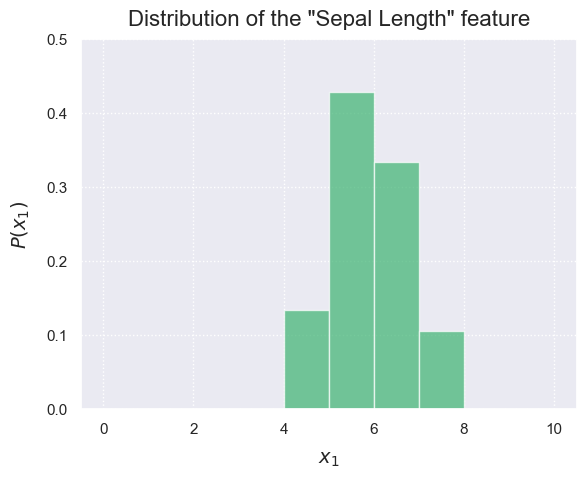

In [22]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{1})$", fontsize=14, labelpad=10)

ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" feature', fontsize=16, pad=10);

How can we approximate the true probability density of the **sepal length** feature using a Gaussian distribution? All we need to do is calculate its mean $\mu$ and standard deviation $\sigma$. Let's start by calculating the mean $\mu$ of the **sepal length** feature:

In [23]:
# calculate the mean of the sepal length observations
mean_sepal_length = np.mean(x_train[:, 0])

# print the obtained mean
print(mean_sepal_length)

5.8428571428571425


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature:

In [24]:
# calculate the standard deviation of the sepal length observations
std_sepal_length = np.std(x_train[:, 0])

# print the obtained standard deviation
print(std_sepal_length)

0.8293264212149339


Now, we can determine the approximate Gaussian (Normal) probability density distribution, $\mathcal{N}(\mu, \sigma)$, for the **sepal length** feature using the values of $\mu$ and $\sigma$ obtained above. To accomplish this, we will utilize the `pdf.norm` function available in the `scipy.stats` package.

In [25]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length, std_sepal_length)

# print obtained probabilities
print(hist_gauss_sepal_length)

[8.01301016e-12 1.86029102e-11 4.25649052e-11 9.59860307e-11
 2.13329039e-10 4.67280334e-10 1.00876641e-09 2.14629446e-09
 4.50063276e-09 9.30129531e-09 1.89451859e-08 3.80311880e-08
 7.52430678e-08 1.46716406e-07 2.81952822e-07 5.34022795e-07
 9.96847508e-07 1.83393206e-06 3.32524262e-06 5.94222397e-06
 1.04655071e-05 1.81659084e-05 3.10770328e-05 5.23971366e-05
 8.70685164e-05 1.42593693e-04 2.30157468e-04 3.66130078e-04
 5.74025688e-04 8.86977961e-04 1.35076535e-03 2.02736796e-03
 2.99896106e-03 4.37214602e-03 6.28208880e-03 8.89608792e-03
 1.24159411e-02 1.70783458e-02 2.31524815e-02 3.09339137e-02
 4.07340673e-02 5.28647601e-02 6.76176911e-02 8.52393228e-02
 1.05902260e-01 1.29674937e-01 1.56492110e-01 1.86129164e-01
 2.18183545e-01 2.52066505e-01 2.87007912e-01 3.22075865e-01
 3.56211614e-01 3.88278687e-01 4.17123455e-01 4.41642899e-01
 4.60854121e-01 4.73959553e-01 4.80401847e-01 4.79903192e-01
 4.72485180e-01 4.58467259e-01 4.38443911e-01 4.13242845e-01
 3.83868278e-01 3.514347

Let's proceed to plot the approximate Gaussian (Normal) probability density distribution of the **sepal length** feature, denoted as $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$.

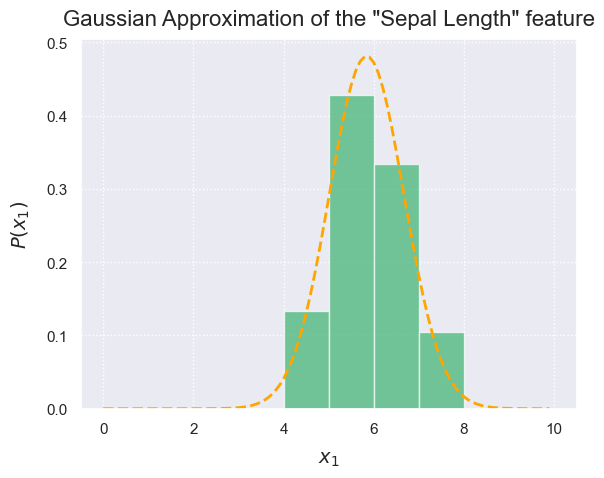

In [26]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_1$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{1})$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" feature', fontsize=16, pad=10);

We can now proceed to plot the approximate Gaussian (Normal) probability density distribution of the **sepal length** feature, represented as $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$.

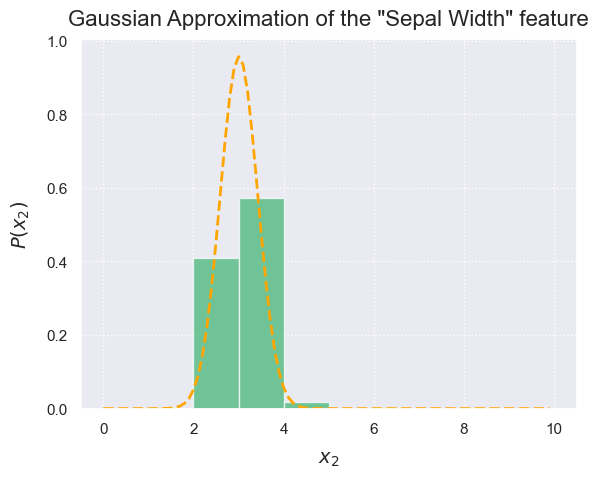

In [27]:
# determine mean and std of the "sepal width" feature
mean_sepal_width = np.mean(x_train[:, 1])
std_sepal_width = np.std(x_train[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width, std_sepal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal width" observations
ax.hist(x_train[:, 1], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_2$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{2})$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" feature', fontsize=16, pad=10);

Approximate the Gaussian (Normal) probability density distribution as $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ for the **petal length** feature and plot its distribution.

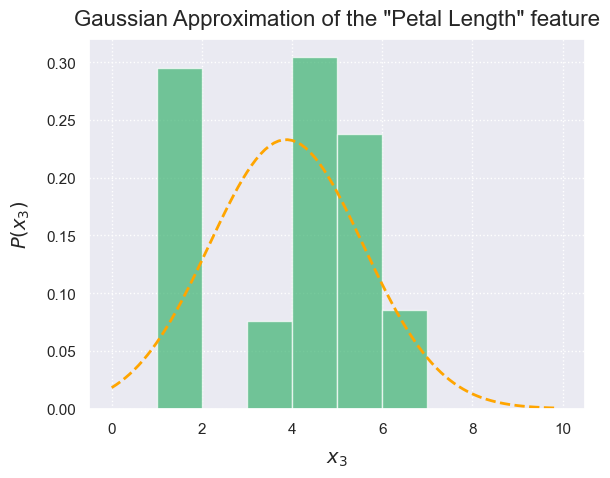

In [28]:
# determine mean and std of the "petal length" feature
mean_petal_length = np.mean(x_train[:, 2])
std_petal_length = np.std(x_train[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length, std_petal_length), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal length" observations
ax.hist(x_train[:, 2], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_3$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{3})$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" feature', fontsize=16, pad=10);

And finally, approximate the Gaussian (Normal) probability density distribution of the **petal width** feature as $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$, and plot its distribution.

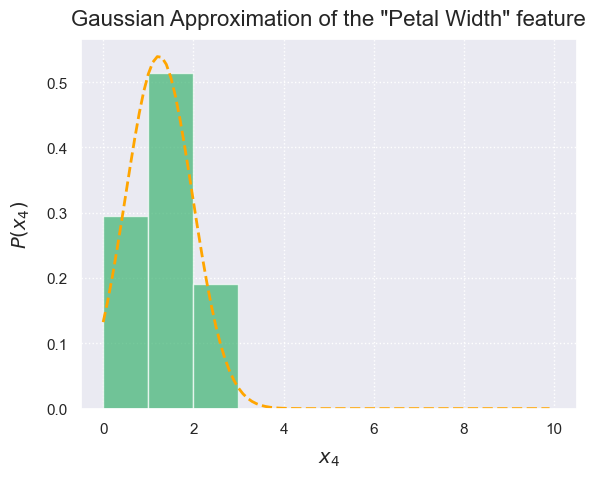

In [29]:
# determine mean and std of the "petal width" feature
mean_petal_width = np.mean(x_train[:, 3])
std_petal_width = np.std(x_train[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width, std_petal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal width" observations
ax.hist(x_train[:, 3], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_4$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{4})$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" feature', fontsize=16, pad=10);

### 4.3 Calculation of the likelihood $P(x|c)$ of each feature

Let's now examine how we can calculate the **likelihood** $P(\mathbf{x}|c)$, which represents the probability density of a feature given a specific class $c$. We will again employ the two techniques we used to calculate the **evidence** $P(x)$ probabilities. To compute the likelihood $P(x|c)$ for a particular observation, such as $x=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5 | c="setosa"\}$, we will apply the following:

**Trick 1: "Conditional Independence"** - By employing the **"Chain Rule of Probabilities"**, we can express the likelihood term $P(\mathbf{x} | c)$ as:

$$P(\mathbf{x} | c) = P(\{x_1, x_2, ..., x_n\} | c) = P(x_1, c) \cdot P(x_2 | x_1, c) \cdot P(x_3 | x_1, x_2, c) \cdot P(x_4 | x_1, x_2, x_3, c) \cdot ... \cdot = \prod^n_i P(x_i | x_{1:i-1}, c)$$

We assume that the distinct features $x_1, x_2, ..., x_n$ are conditionally independent when observing a particular class $c$. Consequently, the likelihood term $P(\mathbf{x} | c)$ simplifies to:

$$P(\mathbf{x} | c) = P(\{x_1, x_2, ..., x_n\} | c) = P(x_1 | c) \cdot P(x_2 | c) \cdot P(x_3 | c) \cdot P(x_4 | c) \cdot ... \cdot P(x_n | c) = \prod^n_i P(x_i | c)$$

Estimating each evidence term $\prod^n_i P(x_i | c)$ involves estimating the distribution of each feature $x_i$ independently.

**Trick 2: "Law of Large Numbers"** - By utilizing this simplification, we can estimate $P(\mathbf{x} | c)$ using a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. The probability density of the Gaussian "Normal" distribution, defined by the following formula, is determined by its mean $\mu$, standard deviation $\sigma$, and the corresponding class condition $c$:

<img align="center" style="max-width: 500px; height: auto" src="./likelihood_calculation.png">

Using the **"Law of Large Numbers,"** we can approximate the probability density function $P(x | c)$ of each feature $x_i$ with a Gaussian distribution $\mathcal{N}(x | \mu, \sigma, c)$. We need to obtain reliable estimates for the parameters $\mu$ and $\sigma$ that characterize a Gaussian (Normal) distribution to accomplish this.

Now, how can we achieve this in practice? We can begin by applying class conditioning, which involves filtering the dataset for each class $c$.

In [30]:
# collect all iris setosa measurements, class label = 0
x_train_setosa = x_train[y_train == 0]

# collect all iris versicolor measurements, class label = 1
x_train_versicolor = x_train[y_train == 1]

# collect all iris virginica measurements, class label = 2
x_train_virginica = x_train[y_train == 2]

Let's begin by inspecting the true probability density of the **sepal length** feature (the first feature) in the iris dataset, given the class **setosa**. The following line of code determines a histogram of the true feature value distribution:

Now, let's plot the probability density accordingly:

In [31]:
# determine a histogram of the "sepal length" feature value distribution given the class "setosa"
hist_setosa, bin_edges_setosa = np.histogram(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True)

# print the histogram feature value probabilites
print(hist_setosa)

# print the histogram edges
print(bin_edges_setosa)

[0.         0.         0.         0.         0.38709677 0.61290323
 0.         0.         0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Now, let's plot the probability density accordingly:

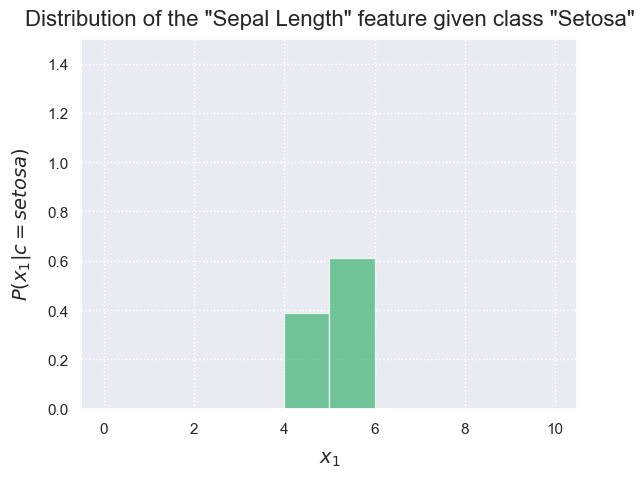

In [32]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{1}|c=setosa)$", fontsize=14, labelpad=10)
ax.set_ylim([0.0, 1.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" feature given class "Setosa"', fontsize=16, pad=10);

Next, we can again approximate the Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given the class **setosa** using the $\mu$ and $\sigma$ values obtained above, along with the `pdf.norm` function from the `scipy.stats` package.

Moving on, let's calculate the mean $\mu$ of the **sepal length** feature for the **setosa** class:

In [33]:
# calculate the mean of the sepal length observations given class "setosa"
mean_sepal_length_setosa = np.mean(x_train_setosa[:, 0])

# print the obtained mean
print(mean_sepal_length_setosa)

4.964516129032259


Similarly, let's calculate the standard deviation $\sigma$ of the **sepal length** feature for the **setosa** class:

In [34]:
# calculate the standard deviation of the sepal length observations given class "setosa"
std_sepal_length_setosa = np.std(x_train_setosa[:, 0])

# print the obtained standard deviation
print(std_sepal_length_setosa)

0.3346142575455468


In [35]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length_setosa = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length_setosa, std_sepal_length_setosa)

# print obtained probabilities
print(hist_gauss_sepal_length_setosa)

[1.89371035e-48 1.52597518e-46 1.12458830e-44 7.57969668e-43
 4.67220906e-41 2.63393397e-39 1.35799970e-37 6.40334116e-36
 2.76137750e-34 1.08907327e-32 3.92826330e-31 1.29585454e-29
 3.90952592e-28 1.07870853e-26 2.72205129e-25 6.28203961e-24
 1.32591966e-22 2.55944574e-21 4.51842230e-20 7.29524505e-19
 1.07722178e-17 1.45473049e-16 1.79668579e-15 2.02942917e-14
 2.09646608e-13 1.98067835e-12 1.71140283e-11 1.35239237e-10
 9.77384288e-10 6.46011381e-09 3.90505505e-08 2.15886918e-07
 1.09153500e-06 5.04732399e-06 2.13450351e-05 8.25552581e-05
 2.92014744e-04 9.44663198e-04 2.79486855e-03 7.56237054e-03
 1.87140030e-02 4.23533346e-02 8.76638824e-02 1.65945686e-01
 2.87291917e-01 4.54875999e-01 6.58680511e-01 8.72305839e-01
 1.05651318e+00 1.17028930e+00 1.18556051e+00 1.09841484e+00
 9.30724686e-01 7.21254023e-01 5.11172450e-01 3.31328508e-01
 1.96409435e-01 1.06482456e-01 5.27965996e-02 2.39412057e-02
 9.92883419e-03 3.76584702e-03 1.30628898e-03 4.14407904e-04
 1.20234464e-04 3.190377

Now, let's plot the approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature for the **setosa** class:

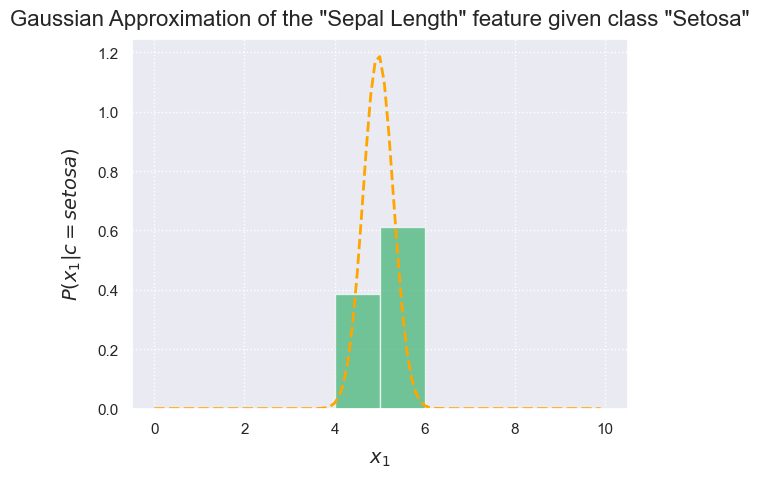

In [36]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length_setosa, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{1}|c=setosa)$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" feature given class "Setosa"', fontsize=16, pad=10);

Likewise, let's approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **sepal width** feature for the **setosa** class and plot its distribution:

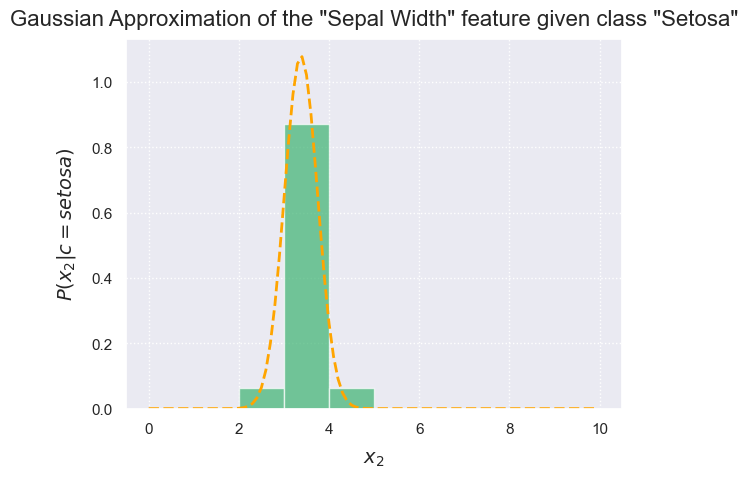

In [37]:
# determine mean and std of the "sepal width" feature given class setosa
mean_sepal_width_setosa = np.mean(x_train_setosa[:, 1])
std_sepal_width_setosa = np.std(x_train_setosa[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width_setosa, std_sepal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 1], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{2}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{2}|c=setosa)$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" feature given class "Setosa"', fontsize=16, pad=10);

Also, approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **petal length** feature for the **setosa** class and plot its distribution:

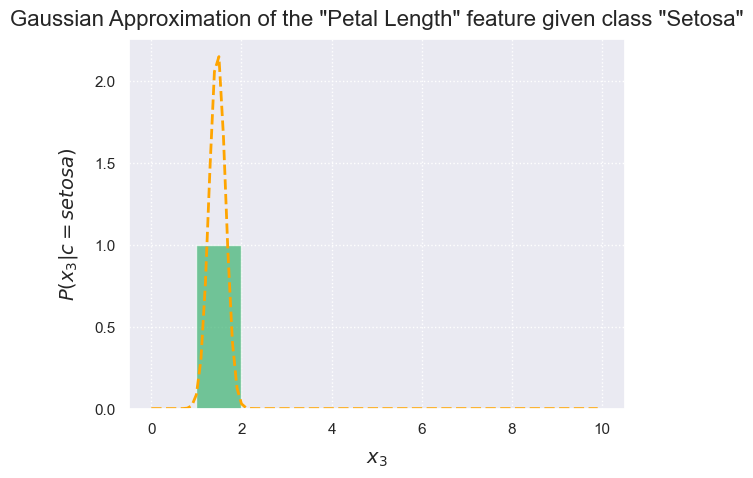

In [38]:
# determine mean and std of the "petal length" feature given class setosa
mean_petal_length_setosa = np.mean(x_train_setosa[:, 2])
std_petal_length_setosa = np.std(x_train_setosa[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length_setosa, std_petal_length_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 2], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{3}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{3}|c=setosa)$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" feature given class "Setosa"', fontsize=16, pad=10);

Lastly, approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **petal width** feature for the **setosa** class and plot its distribution:

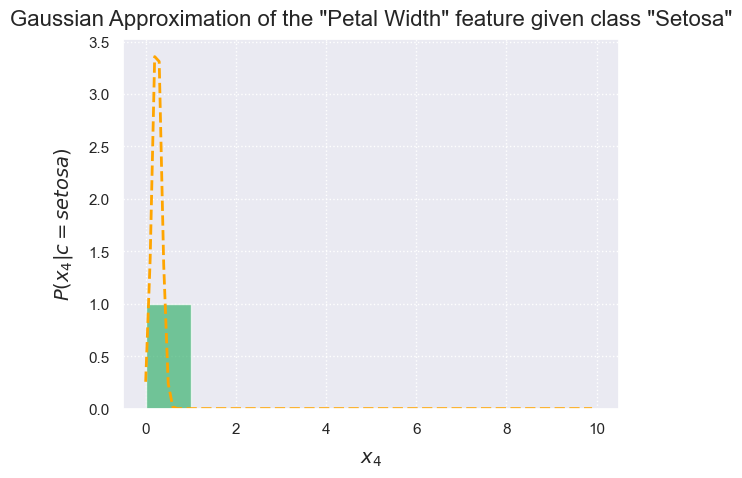

In [39]:
# determine mean and std of the "petal width" feature given class setosa
mean_petal_width_setosa = np.mean(x_train_setosa[:, 3])
std_petal_width_setosa = np.std(x_train_setosa[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width_setosa, std_petal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 3], bins=10, range=(0, 10), density=True, color='mediumseagreen', alpha=0.7)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{4}$", fontsize=14, labelpad=10)
ax.set_ylabel("$P(x_{4}|c=setosa)$", fontsize=14, labelpad=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" feature given class "Setosa"', fontsize=16, pad=10);

Now, let's compute the means and standard deviations of the **'versicolor'** class distributions:

In [40]:
# calculate the mean and std of the sepal length feature given class 'versicolor'
mean_sepal_length_versicolor = np.mean(x_train_versicolor[:, 0])
std_sepal_length_versicolor = np.std(x_train_versicolor[:, 0])

# calculate the mean and std of the sepal width feature given class 'versicolor'
mean_sepal_width_versicolor = np.mean(x_train_versicolor[:, 1])
std_sepal_width_versicolor = np.std(x_train_versicolor[:, 1])

# calculate the mean and std of the petal length width feature given class 'versicolor'
mean_petal_length_versicolor = np.mean(x_train_versicolor[:, 2])
std_petal_length_versicolor = np.std(x_train_versicolor[:, 2])

# calculate the mean and std of the petal width feature given class 'versicolor'
mean_petal_width_versicolor = np.mean(x_train_versicolor[:, 3])
std_petal_width_versicolor = np.std(x_train_versicolor[:, 3])

Similarly, compute the means and standard deviations of the **'virginica'** class distributions:

In [41]:
# calculate the mean and std of the sepal length feature given class 'virginica'
mean_sepal_length_virginica = np.mean(x_train_virginica[:, 0])
std_sepal_length_virginica = np.std(x_train_virginica[:, 0])

# calculate the mean and std of the sepal width feature given class 'virginica'
mean_sepal_width_virginica = np.mean(x_train_virginica[:, 1])
std_sepal_width_virginica = np.std(x_train_virginica[:, 1])

# calculate the mean and std of the petal length width feature given class 'virginica'
mean_petal_length_virginica = np.mean(x_train_virginica[:, 2])
std_petal_length_virginica = np.std(x_train_virginica[:, 2])

# calculate the mean and std of the petal width feature given class 'virginica'
mean_petal_width_virginica = np.mean(x_train_virginica[:, 3])
std_petal_width_virginica = np.std(x_train_virginica[:, 3])

### 4.4 Calculation of the posterior probability $P(c|x)$ of unknown iris flower observations $x^{s}$  

Now, we have determined all the distinct elements of Bayes' theorem: $P(c)$, $P(x)$, and $P(x|c)$. We can use these to determine the posterior probability $P(c=setosa|x)$ of a previously unseen observation $x$ belonging to the **setosa** class. Let's apply this to two unseen **iris flower** observations and see if they correspond to the **setosa** class.

<img align="center" style="max-width: 500px; height: auto" src="./iris_sample_1.png">

(Source: https://de.wikipedia.org/wiki/Schwertlilien)

The first **iris flower** observation $x^{s1}$ exhibits the following feature values: $x^{s1} = \{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}$.

In [42]:
# init features of first iris flower observation 
sepal_length = 5.8 
sepal_width  = 3.5
petal_length = 1.5
petal_width  = 0.25

Let's develop an intuition of the distinct class distributions, including the current observation:

<Figure size 1000x1000 with 0 Axes>

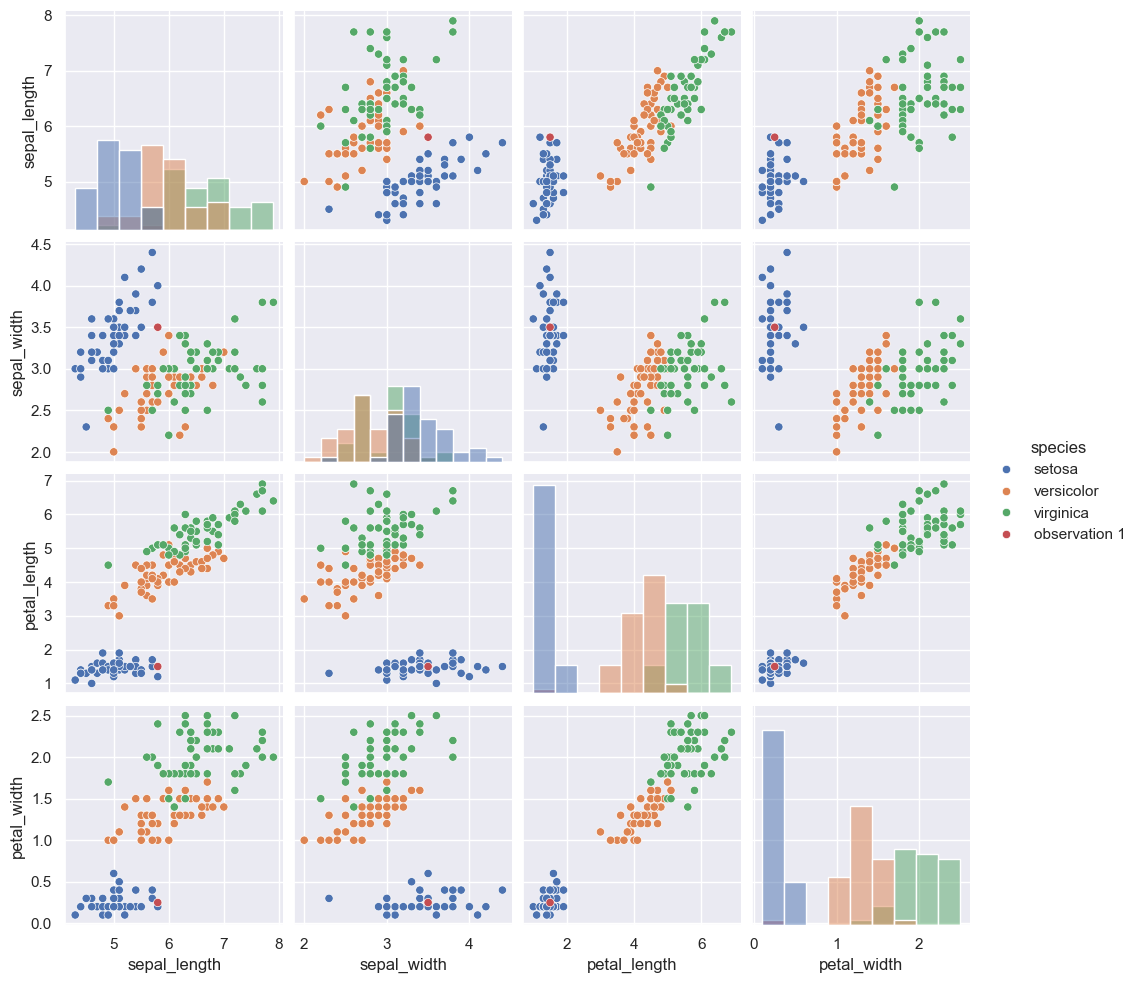

In [43]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observation to the iris dataset
iris_plot = pd.concat([iris_plot, pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width, "observation 1"]], columns=iris_plot.columns, index=[150])])

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Next, we'll determine the posterior probability $P(c=setosa|x^{s1})$:

In [44]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='setosa')
prior = prior_probabilities[0]

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the evidence probability P(x)
evidence = likelihood_setosa * prior_probabilities[0] + likelihood_versicolor * prior_probabilities[1] + likelihood_virginica * prior_probabilities[2]

# determine the posterior probability
posterior_setosa = (prior * likelihood_setosa) / evidence

# print the obtained posterior probability
print(posterior_setosa)

0.9999999999999533


Based on our observation, the posterior probability $P(c=setosa|x^{s1})$ indicates a high likelihood of belonging to the setosa class. To provide a comparison, let's also calculate the posterior probability $P(c=versicolor|x^{s1})$:

In [45]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='versicolor')
prior = prior_probabilities[1]

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the posterior probability
posterior_versicolor = (prior * likelihood_versicolor) / evidence

# print the obtained posterior probability
print(posterior_versicolor)

4.6865898738717404e-14


And the posterior probability $P(c=virginica|x^{s1})`:

In [46]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='virginica')
prior = prior_probabilities[2]

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the posterior probability
posterior_virginica = (prior * likelihood_virginica) / evidence

# print the obtained posterior probability
print(posterior_virginica)

2.197023008334778e-21


Considering the obtained posterior probabilities $P(c|x)$ for the distinct iris flower classes $c = \{setosa, versicolor, virginica\}$ given the unknown observation $x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}$:

$$P(c=setosa|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{0.99}$$
$$P(c=versicolor|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{4.69e^{-14}}$$
$$P(c=virginica|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{2.20e^{-21}}$$

we can now apply our initial classification criteria denoted by $\arg \max_{c} P(c|x)$ to safely determine the most likely class for the observation $c^{*} = setosa$.

Now, let's analyze a second **iris flower** observation and determine its most likely class $c^{*}$:

<img align="center" style="max-width: 500px; height: auto" src="./iris_sample_2.png">


(Source: https://de.wikipedia.org/wiki/Schwertlilien)

The second **iris flower** observation $x^{s2}$ exhibits the following feature values: $x^{s2} = \{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$.

In [47]:
# init a second random feature observation 
sepal_length = 7.8
sepal_width  = 2.3
petal_length = 6.4
petal_width  = 2.5

Let's again develop an intuition of the distinct class distributions, including the current observation:

<Figure size 1000x1000 with 0 Axes>

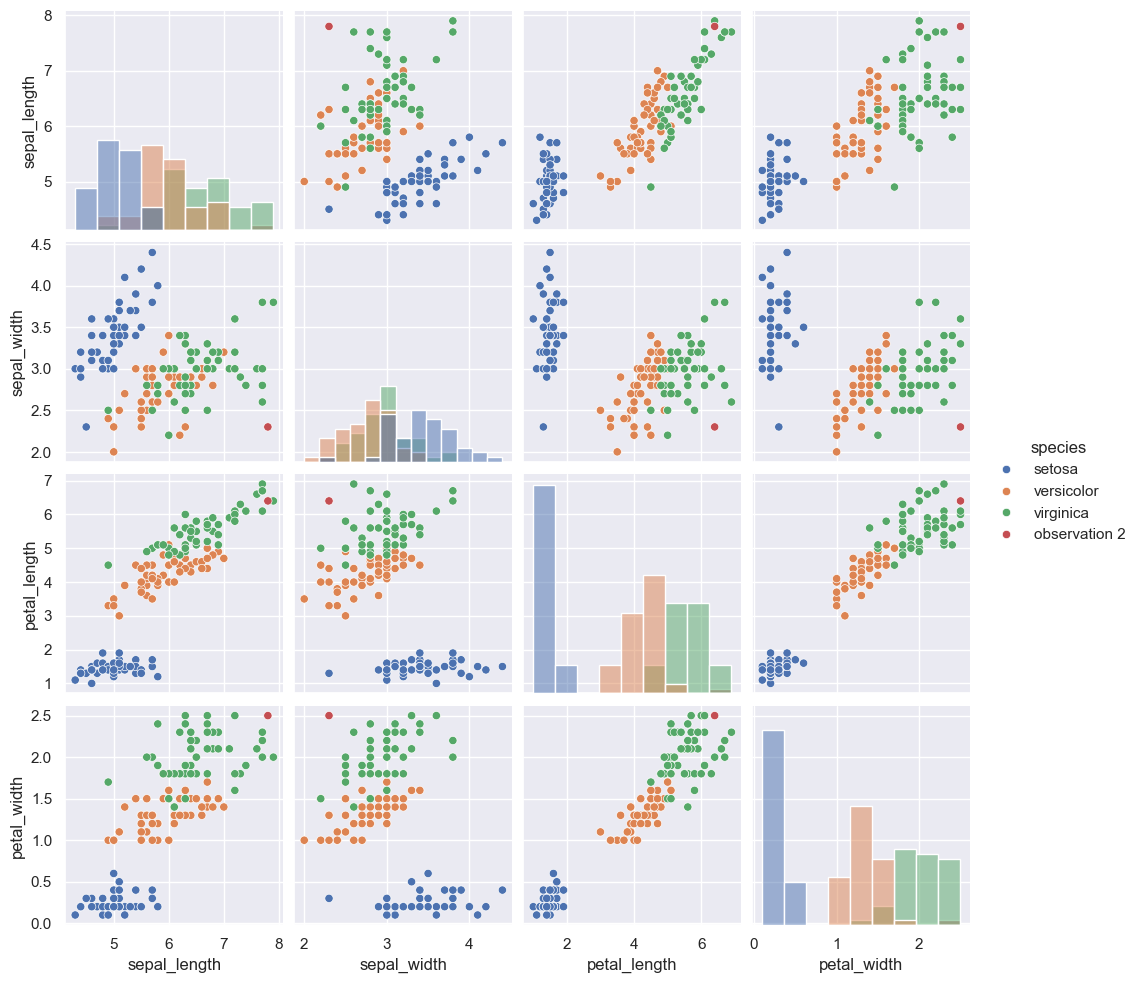

In [48]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observations to the iris dataset
iris_plot = pd.concat([iris_plot, pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width, "observation 2"]], columns=iris_plot.columns, index=[150])])

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Next, we'll determine the posterior probability $P(c=setosa|x^{s2})$:

In [49]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='setosa')
prior = prior_probabilities[0] 

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the evidence probability P(x)
evidence = likelihood_setosa * prior_probabilities[0] + likelihood_versicolor * prior_probabilities[1] + likelihood_virginica * prior_probabilities[2]

# determine the posterior probability
posterior_setosa = (prior * likelihood_setosa) / evidence

# print the obtained posterior probability
print(posterior_setosa)

1.2363455801866644e-268


Based on our observation, the posterior probability $P(c=setosa|x^{s2})$ is shallow, indicating an improbable association with the setosa class. For comparison, let's calculate the posterior probability $P(c=versicolor|x^{s2})`:

In [50]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='versicolor')
prior = prior_probabilities[1]

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the posterior probability
posterior_versicolor = (prior * likelihood_versicolor) / evidence

# print the obtained posterior probability
print(posterior_versicolor)

1.1162843236269123e-12


And the posterior probability $P(c=virginica|x^{s2})`:

In [51]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='virginica')
prior = prior_probabilities[2]

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the posterior probability
posterior_virginica = (prior * likelihood_virginica) / evidence

# print the obtained posterior probability
print(posterior_virginica)

0.9999999999988837


Considering the obtained posterior probabilities $P(c|x)$ for the distinct iris flower classes $c = \{setosa, versicolor, virginica\}$ given the unknown observation $x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

$$P(c=setosa|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{1.24e^{-268}}$$
$$P(c=versicolor|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{1.12e^{-12}}$$
$$P(c=virginica|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{0.99}$$

we can now apply our initial classification criteria denoted by $\arg \max_{c} P(c|x)$ to safely determine the most likely class for the observation $c^{*} = virginica$.

## 5. Gaussian Naive-Bayes Classification using the Sklearn library

Luckily, a Python library called **Scikit-Learn** (https://scikit-learn.org) provides various machine learning algorithms, which can be easily accessed using the Python programming language. It includes supervised classification algorithms like the Gaussian Naive-Bayes classifier that we can readily utilize.

To begin, let's use the "Scikit-Learn" library and instantiate the Gaussian Naive-Bayes classifier:

In [52]:
# init the Gaussian Naive Bayes classifier
gnb = GaussianNB(priors=None)

(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

We will then train or fit the classifier using the features and labels from the training dataset:

In [63]:
# train the Gaussian Naive Bayes classifier
gnb.fit(x_train, y_train);

Once the model is trained, we can employ it to predict the classes of distinct observations within the evaluation dataset:

In [54]:
y_pred = gnb.predict(x_eval)

Let's examine the class labels **predicted** by the Gaussian Naive-Bayes classifier for the evaluation dataset:

In [55]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

As well as the **true** class labels present in the dataset.

In [56]:
y_eval

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Next, we need to determine the **prediction accuracy** of the trained model on the evaluation dataset:

In [57]:
print("Accuracy: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy:  0.9777777777777777


Additionally, we should calculate the number of **misclassified** data samples within the evaluation dataset.

In [58]:
print("Number of mislabeled points out of a total {} points: {}".format(x_eval.shape[0], np.sum(y_eval != y_pred)))

Number of mislabeled points out of a total 45 points: 1


In machine learning, particularly within statistical classification, the **confusion matrix** serves as a critical tool for visualizing the performance of a classification algorithm. This matrix is structured as a table, where each row corresponds to the predictions made by the classifier for each class, and each column denotes the instances of the actual class as observed in the data. This layout simplifies the visualization of the classifier's accuracy across different classes and highlights the types of errors made, thereby providing invaluable insights for improving model performance.

<img align="center" style="max-width: 450px; height: auto" src="./confusion_matrix.png">

(Source: https://en.wikipedia.org/wiki/Confusion_matrix)

Let's determine the **confusion** matrix based on the individual predictions:

In [59]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Next, let's visualize the **confusion matrix** of the individual predictions:

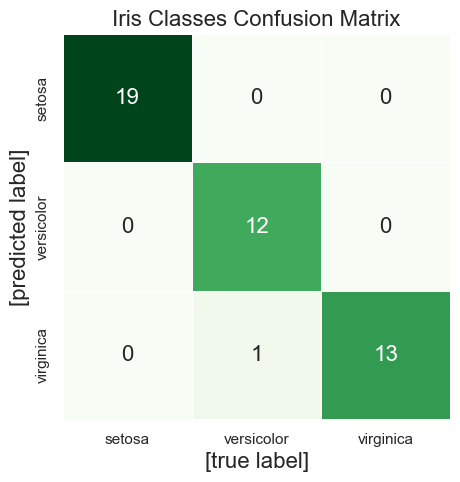

In [60]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, 
            annot=True, 
            cbar=False, 
            cmap='Greens', 
            linewidths=.5, 
            annot_kws={"size": 16}, 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=16)
plt.ylabel('[predicted label]', fontsize=16)

# add plot title
plt.title('Iris Classes Confusion Matrix', fontsize=16);

Finally, let's utilize the learned model to apply it to our unknown observations, represented as $x^{s1}$, in order to determine their corresponding class predictions, denoted as $c^{*}$.

In [61]:
# determine class label prediction of the first unknown observation
class_prediction_sample_1 = gnb.predict([[5.8, 3.5, 1.5, 0.25]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_1[0]])

setosa


Let's likewise obtain the prediction for our second unknown example, represented as $x^{s2}$:

In [62]:
# determine class label prediction of the second unknown observation
class_prediction_sample_2 = gnb.predict([[7.8, 2.3, 6.4, 2.50]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_2[0]])

virginica


Great! For both unknown examples $x^{s1}$ and $x^{s2}$ we obtained exactly the same class predictions as in section 4. of the notebook.

## 6. Lab Summary

In this lab, you successfully accomplished the following key learnings:

> 1. **Understanding Gaussian Naive Bayes:** Mastered the fundamental concepts and mathematical underpinnings of the Gaussian Naive Bayes classifier, enhancing your comprehension of generative models in machine learning.
> 2. **Model Training and Prediction:** Developed practical skills in training a Gaussian Naive Bayes model using Scikit-learn and applying it to predict class labels, which is fundamental for real-world machine learning applications.
> 3. **Evaluating Classifier Performance:** Gained expertise in assessing the performance of classification models using metrics such as accuracy and through the construction and analysis of confusion matrices.

This lab provided insights into Gaussian Naive Bayes classification, equipping you with essential tools and techniques for effective model building, evaluation, and application. These skills are invaluable for navigating and succeeding in complex data-driven tasks in machine learning.